<a href="https://colab.research.google.com/github/kiiriis/CE063_ML/blob/main/Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense, Flatten
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential

In [2]:
from keras.datasets import mnist

(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(features_train.shape, targets_train.shape, features_test.shape, targets_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
X_train = features_train
y_train = targets_train
X_test = features_test
y_test = targets_test

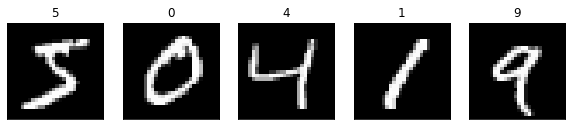

In [5]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [6]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [8]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [9]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [12]:
model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 10s 3ms/step - loss: 1.6263 - acc: 0.5098 - val_loss: 1.2160 - val_acc: 0.6724
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1250 - acc: 0.6596 - val_loss: 0.9726 - val_acc: 0.6968
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9801 - acc: 0.6800 - val_loss: 0.9878 - val_acc: 0.6681
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9069 - acc: 0.6999 - val_loss: 0.8564 - val_acc: 0.7221
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8752 - acc: 0.7203 - val_loss: 0.8280 - val_acc: 0.7472
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8469 - acc: 0.7336 - val_loss: 0.9263 - val_acc: 0.6957
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8146 - acc: 0.7442 - val_loss: 0.8226 - val_acc: 0.7460
Epoch 8/50
1875/1875 [==============================] - 6s 3m

In [13]:
predictions = model.predict(X_test)
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[5.1415394e-05 9.4556698e-04 3.8622643e-03 ... 9.3470466e-01
  5.9703767e-04 4.9082983e-02]
 [7.5200154e-04 6.1526410e-02 8.5012823e-01 ... 1.2289202e-03
  2.1691276e-03 2.4959110e-05]
 [5.3315744e-06 9.6276689e-01 2.7823640e-02 ... 2.7226384e-03
  4.0128985e-03 4.7695150e-05]
 ...
 [1.1296658e-03 5.1230560e-05 2.9919706e-03 ... 1.2424232e-02
  2.9687323e-03 7.8666843e-02]
 [1.7041883e-02 2.9416909e-03 3.2157425e-03 ... 6.6944433e-04
  3.3162048e-01 1.5029574e-02]
 [1.9247683e-02 3.9548979e-07 1.1043161e-02 ... 6.7743624e-04
  1.9384899e-04 4.9729282e-03]]


In [14]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


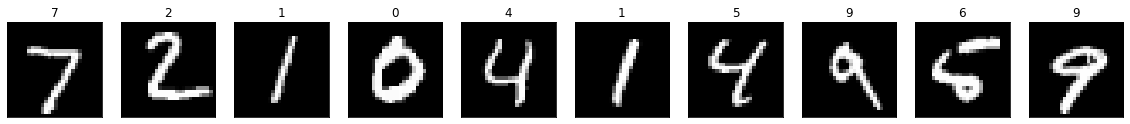

In [15]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()